In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
dir(iris)
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [39, 36, 37]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.625, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 36, 37]'),
 Text(0.5625, 0.8, '  False'),
 Text(0.5, 0.5, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.75, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

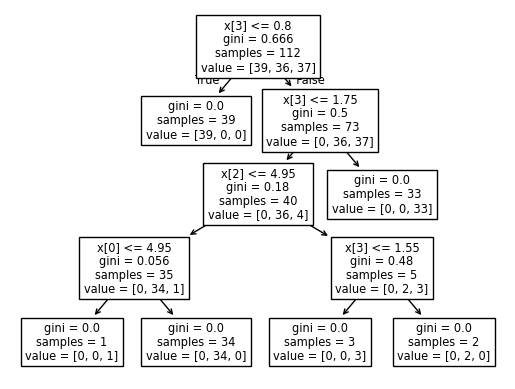

In [5]:
plot_tree(clf)

In [6]:
# 
# !pip install pydotplus


In [7]:
import pydotplus

In [8]:
dot_data = export_graphviz(clf, out_file=None, feature_names = iris.feature_names, class_names = iris.target_names)  #None means, I don't want to store the data in  a new file, i want this function to return the data
#convert to pdf file
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

True

In [9]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2])

In [10]:
y_train_pred = clf.predict(X_train)
y_train_pred
# print(y_train_pred - y_train)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2,
       2, 1])

In [11]:
y_test

array([0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2])

In [12]:
clf.score(X_test, y_test) #perhaps a lot of overfitting because of very high accuracy

0.9210526315789473

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score() provides a more robust evaluation by performing cross-validation. Instead of evaluating the model on a single split of the data (train/test), it splits the data into multiple folds and performs training and testing on each fold. This process gives a better estimate of the model's performance and generalizability.

In [14]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross validation accuracy scores: ", scores)
print("Mean cross-validation accuracy: ", scores.mean())


Cross validation accuracy scores:  [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation accuracy:  0.9666666666666668


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 36,  0],
       [ 0,  0, 37]], dtype=int64)

In [17]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 12]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.86      0.89        14
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

